# Practical Project: Decision Tree and random Forest

In [2]:
#Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.paths import DATA_RAW_DIR
from pathlib import Path

In [3]:
path_car = str(DATA_RAW_DIR / "car_evaluation.csv")
print(Path(path_car).exists())

True


In [4]:
df_car = pd.read_csv(path_car, header=None, sep=",", encoding="utf-8")
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df_car.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [7]:
df_car.duplicated().sum()

np.int64(0)

In [8]:
df_car.shape

(1728, 7)

In [9]:
col_names = [
    'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'
]
df_car.columns = col_names
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [11]:
df_car['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

# Processing data

In [12]:
X = df_car.drop('class', axis=1)
y = df_car['class']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1209, 6), (519, 6), (1209,), (519,))

In [15]:
X_train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [30]:
import category_encoders as ce
col_names = [    'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'
]
encoder = ce.OrdinalEncoder(cols=col_names)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [31]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [32]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=0, max_depth=2)

In [33]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [34]:
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)

In [35]:
# metrics
from sklearn.metrics import accuracy_score

tran_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"Train Accuracy: {tran_accuracy_dt:.4f}")
print(f"Test Accuracy: {test_accuracy_dt:.4f}")

Train Accuracy: 0.7734
Test Accuracy: 0.7592


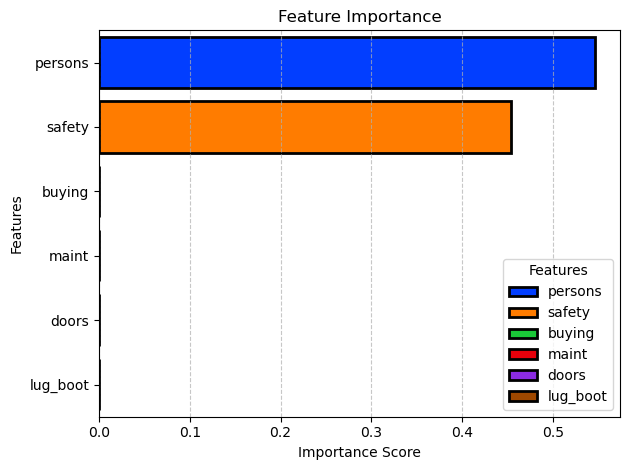

In [43]:
# Feature importance
feature_importance = model_dt.feature_importances_
feature_names = col_names

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x=feature_importances['Importance'],
            y=feature_importances['Feature'],
            palette='bright',
            saturation=2.0,
            edgecolor='black',
            linewidth=2,
            hue=feature_importances['Feature'],
            legend='full')

plt.title('Feature Importance')
plt.legend(title='Features', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Random Fores Training

In [44]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 10, random_state =0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [45]:
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Train Accuracy: {accuracy_train_rf:.4f}")
print(f"Test Accuracy: {accuracy_test_rf:.4f}")

Train Accuracy: 0.9950
Test Accuracy: 0.8844


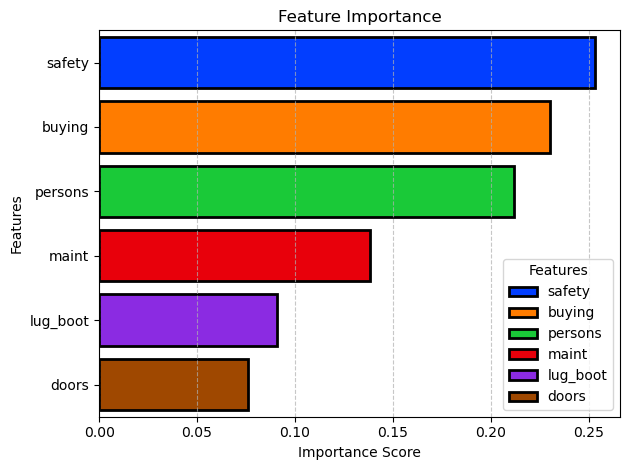

In [47]:
# feature importance
feature_importance_rf = model_rf.feature_importances_
feature_names_rf = col_names

feature_importances_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importance_rf})
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

sns.barplot(x=feature_importances_rf['Importance'],
            y=feature_importances_rf['Feature'],
            palette='bright',
            saturation=2.0,
            edgecolor='black',
            linewidth=2,
            hue=feature_importances_rf['Feature'],
            legend='full')

plt.title('Feature Importance')
plt.legend(title='Features', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [48]:
feature_importances_rf

,Feature,Importance
5,safety,0.253305
0,buying,0.230090
3,persons,0.211846
1,maint,0.138275
4,lug_boot,0.090650
2,doors,0.075834


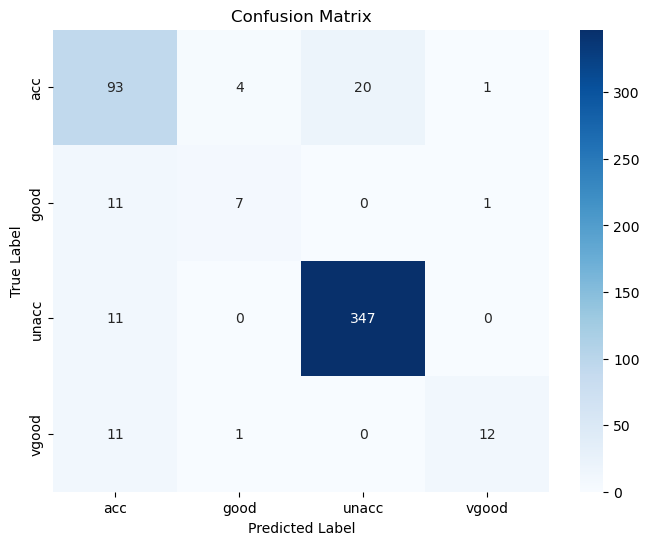

In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf, labels=model_rf.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_,
            yticklabels=model_rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [51]:
cm

array([[ 93,   4,  20,   1],
       [ 11,   7,   0,   1],
       [ 11,   0, 347,   0],
       [ 11,   1,   0,  12]])

In [50]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred_rf, target_names=model_rf.classes_)
print(report)

              precision    recall  f1-score   support

         acc       0.74      0.79      0.76       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.86      0.50      0.63        24

    accuracy                           0.88       519
   macro avg       0.78      0.66      0.70       519
weighted avg       0.88      0.88      0.88       519

